In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet 

In [3]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
print('shape of diabetes.data: ', diabetes.data.shape)

shape of diabetes.data:  (442, 10)


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

In [5]:
trn_df=diabetes.data 
tst_df=diabetes.target

In [6]:
trn_df

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [7]:
tst_df

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [8]:
X_train, X_test, y_train, y_test = train_test_split(trn_df, tst_df, test_size=0.3, random_state=10)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(309, 10) (133, 10) (309,) (133,)


In [10]:
X_train

array([[-0.01277963, -0.04464164,  0.06061839, ...,  0.03430886,
         0.0702113 ,  0.00720652],
       [-0.00551455,  0.05068012,  0.00133873, ..., -0.03949338,
        -0.04118039, -0.08806194],
       [ 0.06350368, -0.04464164,  0.01750591, ...,  0.03430886,
         0.01990842,  0.01134862],
       ...,
       [-0.05273755,  0.05068012, -0.01806189, ...,  0.1081111 ,
         0.03605579, -0.04249877],
       [-0.00551455,  0.05068012, -0.00836158, ..., -0.00259226,
         0.08058546,  0.00720652],
       [-0.03457486,  0.05068012, -0.02560657, ..., -0.01550765,
         0.01482271,  0.04034337]])

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# print('{:.2f}%'.format((model.score(X_train, y_train))*100))

In [13]:
model = LinearRegression()
model.fit(X_test, y_test)

LinearRegression()

In [14]:
# print('{:.2f}%'.format((model.score(X_test, y_test))*100))

In [15]:
print('==== 전체 속성을 학습에 사용한 결과 ===')
print('훈련 데이터의 점수 : {:.2f}%'.format((model.score(X_train, y_train))*100))
print('테스트 데이터의 점수 : {:.2f}%'.format((model.score(X_test, y_test))*100))

==== 전체 속성을 학습에 사용한 결과 ===
훈련 데이터의 점수 : 46.07%
테스트 데이터의 점수 : 54.12%


In [16]:
# trn_df = pd.DataFrame(trn_df)

In [17]:
tst_df1 = tst_df.reshape(-1, 1)

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()   
tst_df1 = scaler.fit_transform(tst_df1)

In [19]:
tst_df1.shape

(442, 1)

In [20]:
scdf = pd.DataFrame(tst_df1, columns = ['x1_std'])
scdf

,x1_std
0,-0.014719
1,-1.001659
2,-0.144580
3,0.699513
4,-0.222496
...,...
437,0.335904
438,-0.625064
439,-0.261454
440,0.881318


In [21]:
print('표준화 이전 혈당값 : \n', tst_df[:5])

표준화 이전 혈당값 : 
 [151.  75. 141. 206. 135.]


In [22]:
print('표준화 이후 혈당값 : \n', scdf['x1_std'].head())

표준화 이후 혈당값 : 
 0   -0.014719
1   -1.001659
2   -0.144580
3    0.699513
4   -0.222496
Name: x1_std, dtype: float64


In [23]:
features, target = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [24]:
data_diabetes = pd.concat([features, target], axis=1)
X = ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
y = 'target'

<AxesSubplot:>

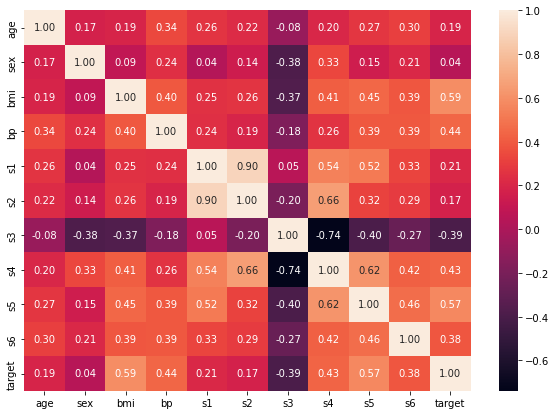

In [25]:
corr = data_diabetes.corr()
fig, ax = plt.subplots(1, 1, figsize=(10, 7))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            annot=True, fmt="0.2f")

In [26]:
c = corr.round(2)['target']

In [27]:
c.sort_values(ascending = False)[-4:-1]

age    0.19
s2     0.17
sex    0.04
Name: target, dtype: float64

In [28]:
from sklearn.datasets import load_diabetes
X, y = datasets.load_diabetes(return_X_y=True)

In [29]:
print(X[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]


In [30]:
datasets = load_diabetes()
X = datasets.data
y = datasets.target
print('X:', X.shape, 'y:', y.shape)
features = datasets.feature_names
print('feature names:', features)
# 모든 특성(컬럼)들이 평균=0, 표준 편차=1 로 전처리가 되어 있는 데이터 세트.
print('X[0] =', X[0])

X: (442, 10) y: (442,)
feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
X[0] = [ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990842 -0.01764613]


In [31]:
bmi = X[:, np.newaxis, 2]

In [32]:
print('bmi.shape:',bmi.shape)
print('bmi[:5] =',bmi[:5])

bmi.shape: (442, 1)
bmi[:5] = [[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [33]:
bmi_train = bmi[:-40]
bmi_test = bmi[-40:]

y_train = y[:-40]
y_test = y[-40:]

In [34]:
regr = LinearRegression()

In [35]:
regr.fit(bmi_train, y_train)

LinearRegression()

In [36]:
print('==== BMI 속성을 학습에 사용한 결과 ===')
print('훈련 데이터의 점수 : {:.2f}%'.format((regr.score(bmi_train, y_train))*100))
print('테스트 데이터의 점수 : {:.2f}%'.format((regr.score(bmi_test, y_test))*100))

==== BMI 속성을 학습에 사용한 결과 ===
훈련 데이터의 점수 : 33.62%
테스트 데이터의 점수 : 42.14%


In [37]:
top = c.sort_values(ascending = False)[-4:-1]

In [42]:
diabetes = load_diabetes()
diabetes_X = diabetes.data[:, np.newaxis, 2]

diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

regr = LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

print('==== BMI 속성을 학습에 사용한 결과 ===')
print('훈련 데이터의 점수 : {:.2f}%'.format((regr.score(diabetes_X_train, diabetes_y_train))*100))
print('테스트 데이터의 점수 : {:.2f}%'.format(regr.score(diabetes_X_test, diabetes_y_test)*100))

==== BMI 속성을 학습에 사용한 결과 ===
훈련 데이터의 점수 : 33.51%
테스트 데이터의 점수 : 47.26%


In [43]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X, y)
importance = np.abs(lasso.coef_)